Here we extract the subset of the whole dataset. We run over several hyperparameters: 
1. the amount of genes to consider for scVelo
2. mixing the pseudotime kernel with the Velocity kernel ratio


we run the main cell developement line idenfied in chan et al (https://doi.org/10.1101/2023.07.31.551262) using the velocity


In [2]:
import pandas as pd ## importsb
import seaborn as sns
import numpy as np
import glob
import os
import random
import scipy
import matplotlib.pyplot as plt
import scvelo as scv
import networkx as nx
import anndata as ad
import cellrank as cr
import scanpy as sc

## 1. load in the datasets take the subsets

In [13]:
wt_all =scv.read('../../labelled/all_info/chan_wt_dynamical_trimmed_with_PAX6.h5ad') ##replace with wt all genes path 
mut_all =scv.read('../../labelled/all_info/chan_mut_dynamical_trimmed_with_PAX6.h5ad') ##replace with mut all genes path 

pathway1_cells = ['RGP1','RGP2','RGP3','IN1','IP','EN','DLN','SLN','IN Progenitor']

wt_path1 = wt_all[wt_all.obs.cluster.isin(pathway1_cells)]
mut_path1 = mut_all[mut_all.obs.cluster.isin(pathway1_cells)]
#mut_all = scv.read('../../labelled/all_info/chan_wt.h5ad')



/Users/samuelheczko/scvelo/scvelo/plotting/utils.py:958: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f"{value_to_plot}_colors"] = palette[:length]
/Users/samuelheczko/scvelo/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/samuelheczko/scvelo/scvelo/plotting/utils.py:958: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f"{value_to_plot}_colors"] = palette[:length]
/Users/samuelheczko/scvelo/scvelo/plotting/scatter.py:655: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


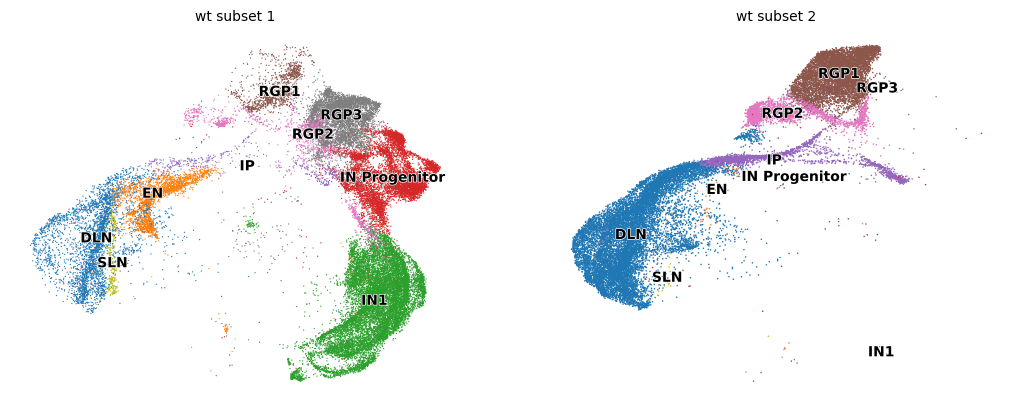

In [14]:
pathway1_cells = ['RGP1','RGP2','RGP3','IN1','IP','EN','DLN','SLN','IN Progenitor']
#mut_all[mut_all.obs.cluster.isin(pathway1_cells)] #subset the cells


with scv.GridSpec(ncols=2) as pl: ##check the subsets
    pl.scatter(mut_path1, color='cluster', color_map='gnuplot',title='mut path 1')
    pl.scatter(wt_path1, color='cluster', color_map='gnuplot',title='wt path 2')
#pathway1_cells = ['RGP1','RGP2','RGP3','IN Progenitor','IN1','IP','EN','DLN','SLN']



## 2. calcualte the dynamics of the system


## 3. build the kernels and transition probability graphs

## 4. calculate the driver genes for each cell fate

ran on python 3.11 with following packages
Package                 Version             Editable project location
----------------------- ------------------- --------------------------
absl-py                 2.0.0 \
aiohttp                 3.8.6 \
aiosignal               1.3.1 \
anndata                 0.10.2 \
annotated-types         0.6.0 \
anyio                   3.7.1 \
appnope                 0.1.2
array-api-compat        1.4
arrow                   1.3.0
asttokens               2.0.5
async-timeout           4.0.3
attrs                   23.1.0
backcall                0.2.0
backoff                 2.2.1
beautifulsoup4          4.12.2
blessed                 1.20.0
boltons                 23.0.0
boto3                   1.28.67
botocore                1.31.67
Brotli                  1.0.9
cellrank                2.0.1.dev7+gf3a6a0e
certifi                 2023.7.22
cffi                    1.15.1
chardet                 5.2.0
charset-normalizer      3.3.0
chex                    0.1.7
click                   8.1.7
comm                    0.1.2
conda                   23.9.0
conda-package-handling  2.2.0
conda_package_streaming 0.9.0
contextlib2             21.6.0
contourpy               1.1.1
cospar                  0.3.3
croniter                1.4.1
cryptography            41.0.3
cycler                  0.12.1
dateutils               0.6.12
debugpy                 1.6.7
decorator               5.1.1
deepdiff                6.6.1
dm-tree                 0.1.8
docrep                  0.3.2
ete3                    3.1.3
etils                   1.5.1
executing               0.8.3
fastapi                 0.104.0
fastcluster             1.2.6
filelock                3.12.4
flax                    0.7.4
fonttools               4.43.1
frozenlist              1.4.0
fsspec                  2023.9.2
gseapy                  1.0.6
h11                     0.14.0
h5py                    3.10.0
htmlmin                 0.1.12
idna                    3.4
igraph                  0.10.8
ImageHash               4.3.1
importlib-resources     6.1.0
inquirer                3.1.3
install                 1.3.5
ipykernel               6.25.2
ipython                 8.15.0
ipywidgets              8.1.1
itsdangerous            2.1.2
jax                     0.4.19
jaxlib                  0.4.19
jedi                    0.18.1
Jinja2                  3.0.3
jmespath                1.0.1
joblib                  1.1.1
jsonpatch               1.32
jsonpointer             2.1
jupyter_client          8.1.0
jupyter_core            5.3.0
jupyterlab-widgets      3.0.9
kiwisolver              1.4.5
leidenalg               0.10.1
lightning               2.0.9.post0
lightning-cloud         0.5.42
lightning-utilities     0.9.0
llvmlite                0.41.0
loompy                  3.0.7
markdown-it-py          3.0.0
MarkupSafe              2.1.3
matplotlib              3.7.0
matplotlib-inline       0.1.6
mdurl                   0.1.2
missingno               0.5.2
mizani                  0.9.3
ml-collections          0.1.1
ml-dtypes               0.3.1
mpmath                  1.3.0
msgpack                 1.0.7
mudata                  0.2.3
multidict               6.0.4
multimethod             1.10
multipledispatch        1.0.0
natsort                 8.4.0
nest-asyncio            1.5.6
networkx                3.1
numba                   0.58.1
numpy                   1.25.0
numpy-groupies          0.10.2
numpyro                 0.13.2
opt-einsum              3.3.0
optax                   0.1.7
orbax-checkpoint        0.4.1
ordered-set             4.1.0
packaging               23.1
pandas                  2.1.1
pandas-profiling        3.2.0
parso                   0.8.3
patsy                   0.5.3
petsc4py                3.19.0
pexpect                 4.8.0
phik                    0.12.3
pickleshare             0.7.5
Pillow                  10.1.0
pip                     23.3
platformdirs            3.10.0
plotnine                0.12.3
pluggy                  1.0.0
progressbar2            4.2.0
prompt-toolkit          3.0.36
protobuf                4.24.4
psutil                  5.9.0
ptyprocess              0.7.0
pure-eval               0.2.2
pycosat                 0.6.6
pycparser               2.21
pydantic                2.1.1
pydantic_core           2.4.0
pygam                   0.9.0
Pygments                2.15.1
pygpcca                 1.0.4
PyJWT                   2.8.0
pynndescent             0.5.10
pyOpenSSL               23.2.0
pyparsing               3.1.1
pyro-api                0.1.2
pyro-ppl                1.8.6
PySocks                 1.7.1
python-dateutil         2.8.2
python-editor           1.0.4
python-multipart        0.0.6
python-utils            3.8.1
pytorch-lightning       2.1.0
pytz                    2023.3.post1
PyWavelets              1.4.1
PyYAML                  6.0.1
pyzmq                   25.1.0
readchar                4.0.5
requests                2.31.0
rich                    13.6.0
ruamel.yaml             0.17.21
s3transfer              0.7.0
scanpy                  1.9.5
scikit-learn            1.1.3
scikit-misc             0.3.0
scipy                   1.11.3
scvelo                  0.3.0               /Users/samuelheczko/scvelo
scvi-tools              1.0.4
seaborn                 0.13.0
session-info            1.0.0
setuptools              68.0.0
six                     1.16.0
slepc4py                3.19.2
sniffio                 1.3.0
soupsieve               2.5
sparse                  0.14.0
stack-data              0.2.0
starlette               0.27.0
starsessions            1.3.0
statsmodels             0.14.0
stdlib-list             0.9.0
sympy                   1.12
tangled-up-in-unicode   0.2.0
tensorstore             0.1.46
texttable               1.7.0
threadpoolctl           3.2.0
toolz                   0.12.0
torch                   2.1.0
torchmetrics            1.2.0
tornado                 6.3.3
tqdm                    4.65.0
traitlets               5.7.1
truststore              0.8.0
types-python-dateutil   2.8.19.14
typing_extensions       4.8.0
tzdata                  2023.3
umap-learn              0.5.4
urllib3                 1.26.18
uvicorn                 0.23.2
visions                 0.7.4
wcwidth                 0.2.5
websocket-client        1.6.4
websockets              11.0.3
wheel                   0.41.2
widgetsnbextension      4.0.9
wrapt                   1.15.0
xarray                  2023.10.1
yarl                    1.9.2
zipp                    3.17.0
zstandard               0.19.0